In [40]:
#imports
import pandas as pd     
import matplotlib.pyplot as plt    
%matplotlib inline
import seaborn as sns    
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import os
sns.set(style="darkgrid")
from math import pi
import os
from glob import glob

Getting Data

In [41]:
# Getting all csv
# Reference: https://perials.com/getting-csv-files-directory-subdirectories-using-python/
def getData(PATH, name):
#     PATH = "happinessData/"
    EXT = "*.csv"
    files = [file for path, subdir, files in os.walk(PATH)
                for file in glob(os.path.join(path, EXT))]
    l = []
    for f,i in zip(files, range(len(files))):
        df = pd.read_csv(f)
        df['video'] = np.full(len(df), i, dtype = int)
        l.append(df)
    df = pd.concat(l, ignore_index=True)
    df['name'] = name
    df = df.rename(columns=lambda x: x.strip())
    return df

Processing Data

In [42]:
def processData(df):
    df = df[df['success'] != 0]
    df = df[df['confidence'] > 0.85]
    #extracting features
    au = [ 'face_id','video', 'gaze_angle_x', 'gaze_angle_y', 'pose_Rx', 'pose_Ry', 'pose_Rz']
    for x in df.columns:
        if '_r' in x and 'AU' in x:
            au.append(x)

    df = df[au]
    return df

Retrieve All Data

In [43]:
happy = pd.DataFrame();
happy = getData("HappinessData/", "happy")
happy = processData(happy)

In [25]:
happy.head(3)

,face_id,video,gaze_angle_x,gaze_angle_y,pose_Rx,pose_Ry,pose_Rz,AU01_r,AU02_r,AU04_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0,0,-0.161,0.422,0.422,0.228,-0.139,0.0,0.0,0.13,...,0.76,1.02,0.0,0.00,0.0,0.0,0.0,0.98,0.66,0.45
1,0,0,-0.161,0.420,0.411,0.222,-0.126,0.0,0.0,0.18,...,0.93,1.05,0.0,0.17,0.0,0.0,0.0,1.04,0.43,0.63
2,0,0,-0.161,0.422,0.415,0.223,-0.125,0.0,0.0,0.10,...,0.97,1.08,0.0,0.20,0.0,0.0,0.0,1.19,0.52,0.63


Process Data

In [6]:
test = happy.copy()

for i in range(len(set(test['video']))):
    lst = test[test['video']==i]['face_id'].tolist()
    if(lst == []):
        continue
    test = test.drop(test[(test['video'] == i) & (test['face_id'] != max(lst,key=lst.count))].index)

test

,face_id,video,gaze_angle_x,gaze_angle_y,pose_Rx,pose_Ry,pose_Rz,AU01_r,AU02_r,AU04_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
27,3,0,-0.134,0.286,0.165,0.198,-0.018,0.00,0.00,2.11,...,0.00,0.00,0.00,0.01,0.00,0.0,0.00,1.91,1.28,0.00
30,3,0,-0.135,0.293,0.186,0.204,0.002,0.00,0.00,1.96,...,0.80,0.00,0.00,0.08,0.00,0.0,0.35,1.88,0.73,0.16
31,3,0,-0.148,0.269,0.164,0.198,0.017,0.00,0.00,2.25,...,0.62,0.00,0.00,0.19,0.00,0.0,0.46,1.69,0.92,0.24
32,3,0,-0.161,0.256,0.162,0.196,0.028,0.00,0.00,1.92,...,0.69,0.00,0.00,0.00,0.00,0.0,0.15,1.41,1.38,0.17
33,3,0,-0.108,0.271,0.128,0.183,0.026,0.00,0.00,1.77,...,1.32,0.00,0.00,0.16,0.00,0.0,0.00,1.50,1.92,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,41,-0.401,0.173,0.182,0.588,-0.142,2.05,0.14,0.87,...,0.00,0.09,0.79,0.71,0.01,0.0,0.00,0.33,0.00,0.07
6431,0,41,-0.450,0.168,0.154,0.634,-0.127,2.67,0.22,0.52,...,0.00,0.00,0.39,0.98,0.00,0.0,0.00,0.00,0.00,0.00
6432,0,41,-0.466,0.208,0.141,0.668,-0.110,2.25,0.00,0.71,...,0.00,0.00,0.37,1.27,0.00,0.0,0.00,0.00,0.00,0.16
6438,0,41,-0.688,0.369,0.497,0.874,-0.292,2.32,0.45,1.28,...,0.30,0.00,0.00,1.26,0.00,0.0,1.61,0.90,0.00,0.00


In [16]:
au = []
for x in happy.columns:
    if '_r' in x and 'AU' in x:
        au.append(x)
test = happy[au]

In [17]:
test

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0.00,0.00,0.13,0.0,0.65,0.05,0.00,0.76,1.02,0.00,0.00,0.0,0.00,0.00,0.98,0.66,0.45
1,0.00,0.00,0.18,0.0,0.49,0.10,0.00,0.93,1.05,0.00,0.17,0.0,0.00,0.00,1.04,0.43,0.63
2,0.00,0.00,0.10,0.0,0.59,0.11,0.02,0.97,1.08,0.00,0.20,0.0,0.00,0.00,1.19,0.52,0.63
3,0.00,0.00,0.19,0.0,0.61,0.13,0.00,0.94,1.09,0.05,0.24,0.0,0.00,0.00,1.19,0.55,0.72
4,0.00,0.00,0.43,0.0,0.72,0.09,0.04,1.06,1.06,0.04,0.22,0.0,0.00,0.00,1.27,0.59,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,0.20,0.28,0.65,0.0,2.36,1.44,0.70,2.70,3.17,2.90,0.70,0.0,0.59,0.00,3.67,0.29,3.51
2862,0.00,0.29,0.80,0.0,2.30,1.43,0.95,2.61,3.12,3.03,0.85,0.0,0.54,0.00,3.47,0.00,3.27
2863,0.02,0.36,0.72,0.0,2.31,1.34,0.90,2.36,3.05,3.12,0.76,0.0,0.66,0.04,3.37,0.00,3.20
2864,0.00,0.35,0.65,0.0,2.33,1.45,0.87,2.40,3.03,3.18,0.63,0.0,0.44,0.03,3.38,0.03,3.17


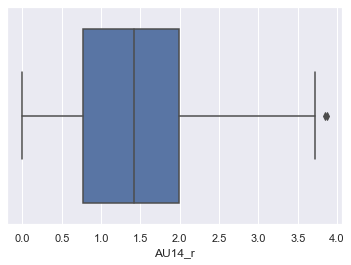

In [18]:
happy = happy[happy['face_id'] == 0]
sns.boxplot(x=test["AU14_r"])
